<a href="https://colab.research.google.com/github/ZerihunWaje/Data-Analytics-projects/blob/main/image_processing_CNN__openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zerihunwaje","key":"e3a488b030b239cb200a3ee011ba78e9"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

 95% 208M/218M [00:01<00:00, 197MB/s]
100% 218M/218M [00:01<00:00, 173MB/s]


In [5]:
!unzip cat-and-dog.zip -d cat-and-dog

Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [7]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# Define path to your cat and dog image folder
cat_folder='cat-and-dog/training_set/training_set/cats/'
dog_folder='cat-and-dog/training_set/training_set/dogs/'
#initialize to store images and labels
images=[]
labels=[]
#load and preprocess cat images
for filename in os.listdir(cat_folder):
    if filename.endswith('.jpg'):
      img=cv2.imread(os.path.join(cat_folder,filename))
      img=cv2.resize(img,(128,128)) # resize the image to common size
      images.append(img)
      labels.append(0) # 0 represents cats
# Load and preprocess dog images
for filename in os.listdir(dog_folder):
    if filename.endswith('.jpg'):
      img=cv2.imread(os.path.join(dog_folder,filename))
      img=cv2.resize(img,(128,128)) # resize the image to common size
      images.append(img)
      labels.append(1)   #1 represents dogs
# convert lists to numpy array
images=np.array(images)
labels=np.array(labels)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2, random_state=42)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)), # output layer
    layers.MaxPooling2D((2,2)),# output layers
    layers.Conv2D(64,(3,3),activation='relu'), #hidden layers
    layers.MaxPooling2D((2,2)),# midle layers
    layers.Flatten(),# middle layers
    layers.Dense(64,activation='relu'), #output layer
    layers.Dense(2,activation='softmax') #2 classes:cats and dogs # output layers
    ])
#Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [17]:
#train the model
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
161/161 [==============================] - 127s 780ms/step - loss: 16.2281 - accuracy: 0.5479 - val_loss: 0.6844 - val_accuracy: 0.5933
Epoch 2/10
161/161 [==============================] - 121s 746ms/step - loss: 0.5903 - accuracy: 0.6810 - val_loss: 0.6966 - val_accuracy: 0.6112
Epoch 3/10
161/161 [==============================] - 118s 733ms/step - loss: 0.4688 - accuracy: 0.7734 - val_loss: 0.7609 - val_accuracy: 0.6237
Epoch 4/10
161/161 [==============================] - 119s 743ms/step - loss: 0.3691 - accuracy: 0.8360 - val_loss: 0.8223 - val_accuracy: 0.6339
Epoch 5/10
161/161 [==============================] - 119s 739ms/step - loss: 0.2534 - accuracy: 0.8960 - val_loss: 0.9933 - val_accuracy: 0.6276
Epoch 6/10
161/161 [==============================] - 119s 741ms/step - loss: 0.1743 - accuracy: 0.9299 - val_loss: 1.2635 - val_accuracy: 0.6456
Epoch 7/10
161/161 [==============================] - 119s 741ms/step - loss: 0.1459 - accuracy: 0.9481 - val_loss: 1.5988 

In [18]:
# Evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy:{test_acc}')

51/51 - 10s - loss: 1.9972 - accuracy: 0.6065 - 10s/epoch - 196ms/step
Test accuracy:0.6064959168434143


In [21]:
#Example: Predicting on a single image
sample_image=x_test[3] #replace with  your image data
predictions=model.predict(np.expand_dims(sample_image,axis=0))
predicted_label=np.argmax(predictions)

#You can interpret the label using your datasets calss labels(0 fro cats,1 fro dogs)
class_labels=['cat','dog']
predicted_class=class_labels[predicted_label]
print(f'predicted class:{predicted_class}')

1/1 [==============================] - 0s 28ms/step
predicted class:cat


<function matplotlib.pyplot.show(close=None, block=None)>

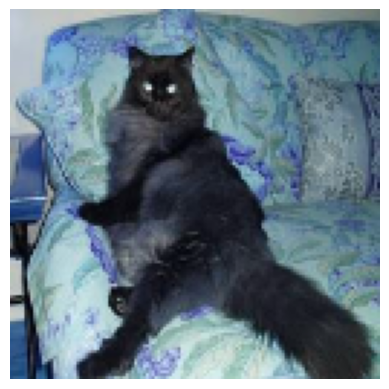

In [22]:
import matplotlib.pyplot as plt
#Display the sample image
plt.imshow(sample_image)
plt.axis('off') #turn off axis labels and ticks
plt.show

In [25]:
#Example: Predicting on a single image
sample_image=x_test[7] #replace with  your image data
predictions=model.predict(np.expand_dims(sample_image,axis=0))
predicted_label=np.argmax(predictions)

#You can interpret the label using your datasets calss labels(0 fro cats,1 fro dogs)
class_labels=['cat','dog']
predicted_class=class_labels[predicted_label]
print(f'predicted class:{predicted_class}')

1/1 [==============================] - 0s 29ms/step
predicted class:cat


<function matplotlib.pyplot.show(close=None, block=None)>

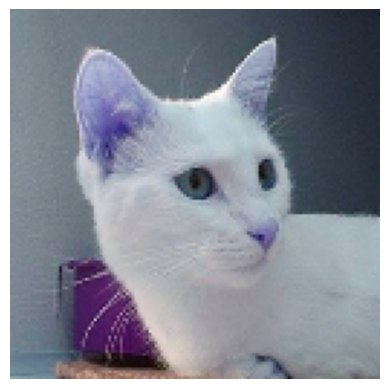

In [26]:
import matplotlib.pyplot as plt
#Display the sample image
plt.imshow(sample_image)
plt.axis('off') #turn off axis labels and ticks
plt.show